###Import Statements

In [41]:
!pip install --upgrade git+https://github.com/openai/gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/openai/gym to /tmp/pip-req-build-jq5cffm5
  Running command git clone -q https://github.com/openai/gym /tmp/pip-req-build-jq5cffm5
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


In [ ]:
!pip install autorom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade gym[atari]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.8 MB/s 


In [ ]:
!AutoROM

AutoROM will download the Atari 2600 ROMs.
They will be installed to:
	/usr/local/lib/python3.7/dist-packages/AutoROM/roms

Existing ROMs will be overwritten.

I own a license to these Atari 2600 ROMs.
I agree to not distribute these ROMs and wish to proceed: [Y/n]: y
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/adventure.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/air_raid.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/alien.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/amidar.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/assault.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/asterix.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/asteroids.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/atlantis.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/roms/atlantis2.bin
Installed /usr/local/lib/python3.7/dist-packages/AutoROM/rom

In [ ]:
!pip install gym[toy_text]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 18.3 MB 95 kB/s 


In [ ]:
import numpy as np
import gym
import ale_py
import random
import time

In [ ]:
pip install keras-rl2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52 kB 678 kB/s 


In [ ]:
from rl.memory import SequentialMemory
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from tensorflow.keras.optimizers import Adam
from rl.agents.dqn import DQNAgent

###Setting up Environment and Initializing the Q Table

In [ ]:
env = gym.make("Taxi-v3").env

In [ ]:
n_observations = env.observation_space.n
n_actions = env.action_space.n

In [ ]:
q_table = np.zeros([env.observation_space.n, env.action_space.n])
print(q_table)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


Establishing Baseline Performance

###Question 1
The score after 100 test episodes for the baseline performance is:

Average timesteps per episode: 13.25


Average penalties per episode: 0.0

In [42]:
from IPython.display import clear_output
alpha = 0.7
gamma = 0.6
epsilon = 0.1
max_epsilon = 0.1
min_epsilon = 0.001
decay_rate = 0.01
total_episodes = 10000
max_steps = 99

all_epochs = []
all_penalties = []

for i in range(1, total_episodes):
    state = env.reset()
    state1 = state[0]

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state1]) # Exploit learned values
            #print(action)

        next_state, reward, done,_, info = env.step(action) 
        
        old_value = q_table[state1, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state1, action] = new_value

        if reward == -10:
            penalties += 1

        state1 = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 9900
Training finished.



In [43]:
total_epochs, total_penalties,total_rewards = 0, 0,0
total_test_episodes  = 100

for _ in range(total_test_episodes ):
    state = env.reset()
    state1 = state[0]
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state1])
        state1, reward, done,_, info = env.step(action)
        total_rewards += reward

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
    

print(f"Results after {total_test_episodes } episodes:")
print(f"Average reward per episode: {total_rewards / total_test_episodes }")
print(f"Average timesteps per episode: {total_epochs / total_test_episodes }")
print(f"Average penalties per episode: {total_penalties / total_test_episodes }")

Results after 100 episodes:
Average reward per episode: 7.75
Average timesteps per episode: 13.25
Average penalties per episode: 0.0


###Question 2
The state space and action space are 500, 6 

The actions are 
0 = South
1 = North
2 = East
3 = West
4 = Pickup
5 = Dropoff

The size of the Q Table is 3000

In [44]:
print("The state space and the action space are:", n_observations,n_actions)

The state space and the action space are: 500 6


In [45]:
print("The size of the Q Table is",q_table.size)

The size of the Q Table is 3000


###Question 3

There are four locations at the four corners of the table. A passenger is waiting for the taxi at one location and you have to drive him to the designated location. You are rewarded for each move, with a low penalty when you are on travel, with a large penalty if you pick-up or drop-off the passenger at the wrong location, but you earn a big reward if you succeed. 

###Question 4

Alpha, Gamma values choosing and working with different values

In [48]:
alpha = 0.5
gamma = 0.2
epsilon = 0.1
max_epsilon = 0.1
min_epsilon = 0.001
decay_rate = 0.01
total_episodes = 10000
max_steps = 99

all_epochs = []
all_penalties = []

for i in range(1, total_episodes):
    state = env.reset()
    state1 = state[0]

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state1]) # Exploit learned values
            #print(action)

        next_state, reward, done,_, info = env.step(action) 
        
        old_value = q_table[state1, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state1, action] = new_value

        if reward == -10:
            penalties += 1

        state1 = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")


Episode: 9900
Training finished.



In [49]:
total_epochs, total_penalties,total_rewards = 0, 0,0
total_test_episodes  = 100

for _ in range(total_test_episodes ):
    state = env.reset()
    state1 = state[0]
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state1])
        state1, reward, done,_, info = env.step(action)
        total_rewards += reward

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
   

print(f"Results after {total_test_episodes } episodes:")
print(f"Average reward per episode: {total_rewards / total_test_episodes }")
print(f"Average timesteps per episode: {total_epochs / total_test_episodes }")
print(f"Average penalties per episode: {total_penalties / total_test_episodes }")

Results after 100 episodes:
Average reward per episode: 7.93
Average timesteps per episode: 13.07
Average penalties per episode: 0.0


###Question 5

Using a policy other than e greedy and its effect on the baseline


In [ ]:
input_shape = (1,) + env.observation_space.shape

In [ ]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

# Compute dimensions
n_action = env.action_space.n
input_shape = (1,) + env.observation_space.shape # (1,) is the batch size that the model expects in input.

# Create model
model = Sequential()
model.add(Dense(128, activation="elu", input_shape=input_shape))
model.add(Flatten())
model.add(Dense(64, activation="elu"))
model.add(Dense(n_action, activation="linear"))

In [ ]:
memory = SequentialMemory(limit=10000, window_length=1)

policy = LinearAnnealedPolicy(
    EpsGreedyQPolicy(),
    attr="eps",
    value_max=1.0,
    value_min=0.05,
    value_test=0.0,
    nb_steps=10000,
)

dqn = DQNAgent(
    model=model,
    nb_actions=n_action,
    policy=policy,
    memory=memory,
    nb_steps_warmup=1000,
    gamma=0.5,
    target_model_update=1,
    delta_clip=0.01,
    enable_double_dqn=True,
)
dqn.compile(Adam(learning_rate=0.00025), metrics=["mae"])

In [ ]:
dqn.fit(env, nb_steps=10000)
env.close()

Training for 10000 steps ...
Interval 1 (0 steps performed)


ValueError: ignored

###Question 6
Decay rate and starting epsilon
How did it change the baseline performance? What is the value of epsilon when if you reach the max steps per episode? (5 Points)

Starting Epsilon of 0.1 was chosen.

Epsilon Decay is the decay rate where the value decreases after an epsiode. An epsilon Decay of 0.01 was chosen as this would provide a better balance between Exploration-Exploitation.

To test different values of epsilon, the starting espilon starts 1 for max exploration and a faster decay rate of 0.7 to test performance

In [50]:
alpha = 0.5
gamma = 0.2
epsilon = 1
max_epsilon = 0.1
min_epsilon = 0.001
decay_rate = 0.7
total_episodes = 10000
max_steps = 99

all_epochs = []
all_penalties = []

for i in range(1, total_episodes):
    state = env.reset()
    state1 = state[0]

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state1]) # Exploit learned values
            #print(action)

        next_state, reward, done,_, info = env.step(action) 
        
        old_value = q_table[state1, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state1, action] = new_value

        if reward == -10:
            penalties += 1

        state1 = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 9900
Training finished.



In [ ]:
total_epochs, total_penalties,total_rewards = 0, 0,0
total_test_episodes  = 100

for _ in range(total_test_episodes ):
    state = env.reset()
    state1 = state[0]
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state1])
        state1, reward, done,_, info = env.step(action)
        total_rewards += reward

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs
   

print(f"Results after {total_test_episodes } episodes:")
print(f"Average reward per episode: {total_rewards / total_test_episodes }")
print(f"Average timesteps per episode: {total_epochs / total_test_episodes }")
print(f"Average penalties per episode: {total_penalties / total_test_episodes }")

###Question 7 
The average number of time steps per episode is 13.16

###Question 8

Is Q LearningPolicy based or value based

Q learning is a value-based off-policy temporal difference(TD) reinforcement learning. Off-policy means an agent follows a behaviour policy for choosing the action to reach the next state s_t+1 from state s_t. From s_t+1, it uses a policy π that is different from behaviour policy. In Q-learning, we take absolute greedy action as policy π from the next state s_t+1.

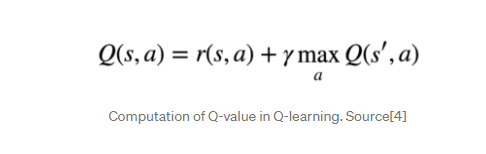

the above equation indicates how we compute the Q-value for an action a starting from state s in Q learning. It is the sum of immediate reward using a behaviour policy(ϵ-soft, ϵ-greedy or softmax) and from state s_t+1, it takes the absolute greedy action (choose the action that has maximum Q value over other actions).

###Question 9 

 Could you use SARSA for this problem? 

Since we do not encode any prior knowledge about the outside world into the agent and the state transition function is hard to mode, SARSA can also be an approach to train the agent using an exploration policy like Epsilon-Greedy.

###Question 10

What is meant by the expected lifetime value in the Bellman equation?

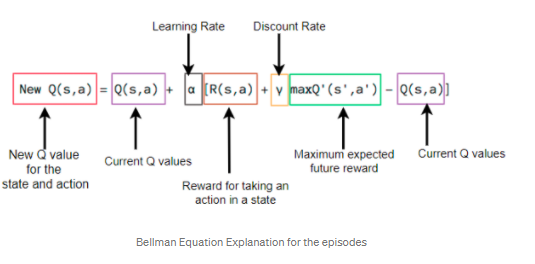

It refers to the process of using the embedding and optimization principles to create a system of functional equations.Unique solutions should be explored for certain issues.



###Question 11

When would SARSA likely do better than Q-learning?

If your goal is to train an optimal agent in simulation, or in a low-cost and fast-iterating environment, then Q-learning is a good choice, due to the first point (learning optimal policy directly). If your agent learns online, and you care about rewards gained whilst learning, then SARSA may be a better choice.

###Question 12

How does SARSA differ from Q-learning? 

Q-learning has the following advantages and disadvantages compared to SARSA:

Q-learning directly learns the optimal policy, whilst SARSA learns a near-optimal policy whilst exploring. If you want to learn an optimal policy using SARSA, then you will need to decide on a strategy to decay ϵ in ϵ-greedy action choice, which may become a fiddly hyperparameter to tune.

Q-learning (and off-policy learning in general) has higher per-sample variance than SARSA, and may suffer from problems converging as a result. This turns up as a problem when training neural networks via Q-learning.

SARSA will approach convergence allowing for possible penalties from exploratory moves, whilst Q-learning will ignore them. That makes SARSA more conservative - if there is risk of a large negative reward close to the optimal path, Q-learning will tend to trigger that reward whilst exploring, whilst SARSA will tend to avoid a dangerous optimal path and only slowly learn to use it when the exploration parameters are reduced. The classic toy problem that demonstrates this effect is called cliff walking.

In practice the last point can make a big difference if mistakes are costly - e.g. you are training a robot not in simulation, but in the real world. You may prefer a more conservative learning algorithm that avoids high risk, if there was real time and money at stake if the robot was damaged.

###Question 13

Explain the Q-learning algorithm.

Q-Learning is a value-based learning algorithm. Value based algorithms updates the value function based algorithms updates the value function based on an equation (Bellman equation). Where as policy-based estimates the value function with a greedy policy obtained from the last policy improvement.

Q-learning is an off-policy learner. Means it learns the value of the optimal policy independently of the agent’s actions. On the other hand, an on-policy learner learns the value of the policy being carried out by the agent, including the exploration steps and it will find a policy that is optimal, taking into account the exploration inherent in the policy.

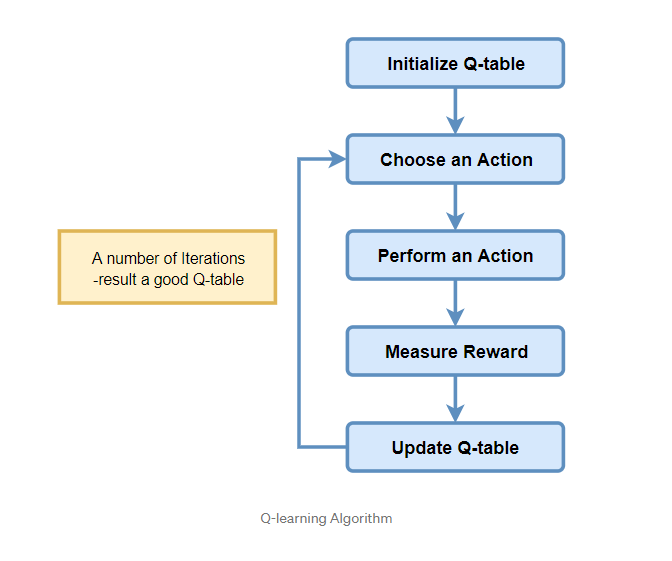

Step 1: Initialize the Q-Table
First the Q-table has to be built. There are n columns, where n= number of actions. There are m rows, where m= number of states.

Step 2 : Choose an Actiom
Step 3: Perform an Action
The combination of steps 2 and 3 is performed for an undefined amount of time. These steps runs until the time training is stopped, or when the training loop stopped as defined in the code.

First, an action (a) in the state (s) is chosen based on the Q-Table. Note that, as mentioned earlier, when the episode initially starts, every Q-value should be 0.

Then, update the Q-values for being at the start and moving right using the Bellman equation which is stated above.

Epsilon greedy strategy concept comes in to play here. In the beginning, the epsilon rates will be higher. The agent will explore the environment and randomly choose actions. This occurs like this logically,since the agent does not know anything about the environment. As the agent explores the environment, the epsilon rate decreases and the agent starts to exploit the environment.

During the process of exploration, the agent progressively becomes more confident in estimating the Q-values.

Steps 4 : Measure Reward
Now we have taken an action and observed an outcome and reward.

Steps 5 : Evaluate
We need to update the function Q(s,a).

This process is repeated again and again until the learning is stopped. In this way the Q-Table is been updated and the value function Q is maximized. Here the Q(state, action) returns the expected future reward of that action at that state.

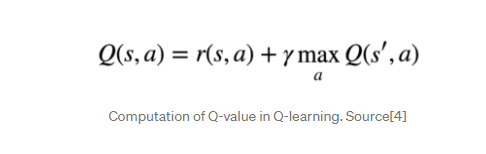



###Question 14

Explain SARSA Algorithm

The Sarsa algorithm is an On-Policy algorithm for TD-Learning.


The name Sarsa comes from the fact that the updates are done using the quintuple Q(s, a, r, s', a'). Where: s, a are the original state and action, r is the reward observed in the following state and s', a' are the new state-action pair.


Here, the equation for SARSA depends on the current state, current action, reward obtained, next state and next action. This observation lead to the naming of the learning technique as SARSA stands for State Action Reward State Action which symbolizes the tuple (s, a, r, s’, a’).

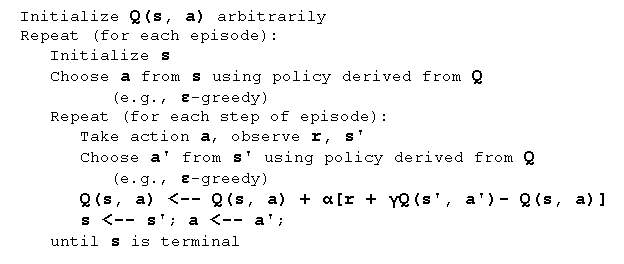

###Question 15

What code is yours and what have you adapted?



1. Learn Data Science - https://www.learndatasci.com/tutorials/reinforcement-q-learning-scratch-python-openai-gym/

2. OpenAI Gym Environment - https://github.com/lhvy/Taxi-v3-Q-Learning

3. Q-Learning - https://towardsdatascience.com/practical-reinforcement-learning-02-getting-started-with-q-learning-582f63e4acd9

4. Medium - https://medium.com/nerd-for-tech/reinforcement-learning-deep-q-learning-with-atari-games-63f5242440b1

5. Q Learning - https://www.freecodecamp.org/news/an-introduction-to-q-learning-reinforcement-learning-14ac0b4493cc/#:~:text=Q%2DTable%20is%20just%20a,at%20each%20non%2Dedge%20tile.

6. SARSA - https://www.geeksforgeeks.org/sarsa-reinforcement-learning/

7. DQN Implementation - https://github.com/nicknochnack/KerasRL-OpenAI-Atari-SpaceInvadersv0/blob/main/Space%20Invaders%20Walkthrough.ipynb

8. LinearAnnealedPolicy- https://poke-env.readthedocs.io/en/stable/rl_with_open_ai_gym_wrapper.html

16. Licensing

MIT License

Copyright (c) 2022 Poojitha Konduparti

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.